In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("adult.csv", header=None)

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
df.keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [52]:
df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "educational-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital-gain",
    "capital-loss",
    "hrs-per-week",
    "native-country",
    "income"
]


In [53]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [54]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [55]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# DATA CLEANING

In [56]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col] = df[col].str.strip()

# Handling Missing Values

In [57]:
df.replace('?', np.nan, inplace=True)
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

# EDA

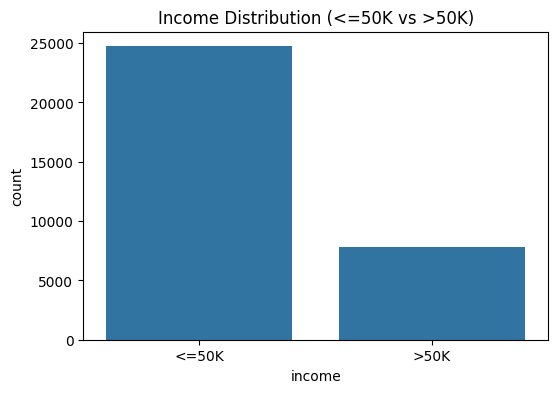

In [58]:
# Income Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Income Distribution (<=50K vs >50K)')
plt.savefig('income_distribution.png')

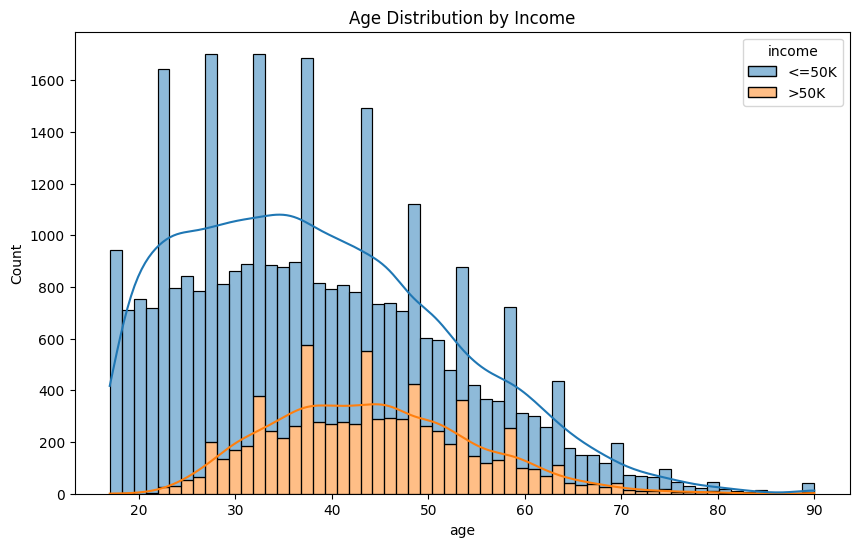

In [59]:
# Age vs Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', multiple="stack", kde=True)
plt.title('Age Distribution by Income')
plt.savefig('age_by_income.png')

# Feature Engineering

In [60]:
df_refined = df.drop(['education', 'fnlwgt'], axis=1)
df_refined.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
# Encode categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_refined.select_dtypes(include=['object']).columns:
    df_refined[col] = le.fit_transform(df_refined[col])

# Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df_refined.drop('income', axis=1)
y = df_refined['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [63]:
import category_encoders as ce

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
# encoder = ce.OneHotEncoder(cols=categorical)
# X_train_encoded = encoder.fit_transform(X_train)  
# X_test_encoded = encoder.transform(X_test)

In [66]:
X_train.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hrs-per-week,native-country
20349,44,1,4,0,5,1,4,1,0,0,40,38
1109,41,3,11,2,13,0,4,1,0,0,55,38
22012,28,3,10,4,3,1,4,1,0,0,50,38
31767,19,3,10,4,5,3,4,1,0,0,25,38
8482,26,3,9,4,10,4,4,1,0,0,44,38


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Evaluation

In [68]:
y_pred = nb_model.predict(X_test)

In [74]:
nb_model.score(X_train, y_train)

0.7992168304668305

In [70]:
nb_model.score(X_test, y_test)

0.8083832335329342

In [71]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8084

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4968
           1       0.70      0.34      0.46      1545

    accuracy                           0.81      6513
   macro avg       0.76      0.65      0.67      6513
weighted avg       0.79      0.81      0.78      6513



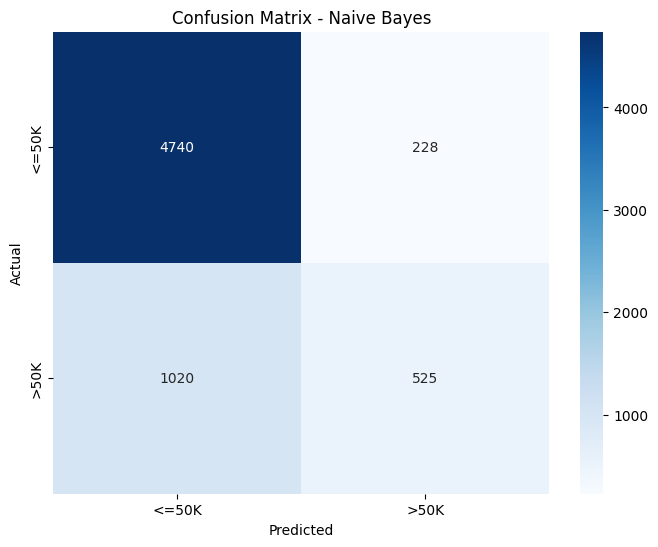

In [72]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.savefig('confusion_matrix.png')

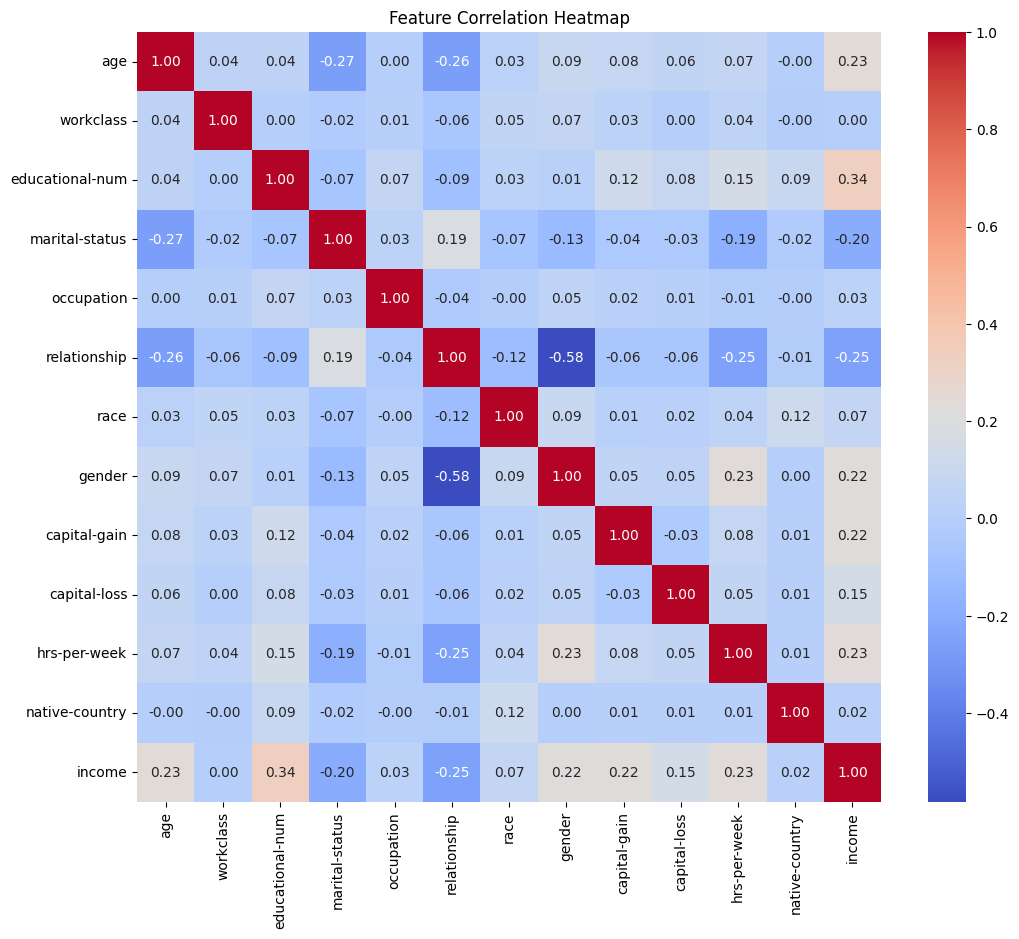

In [73]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_refined.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

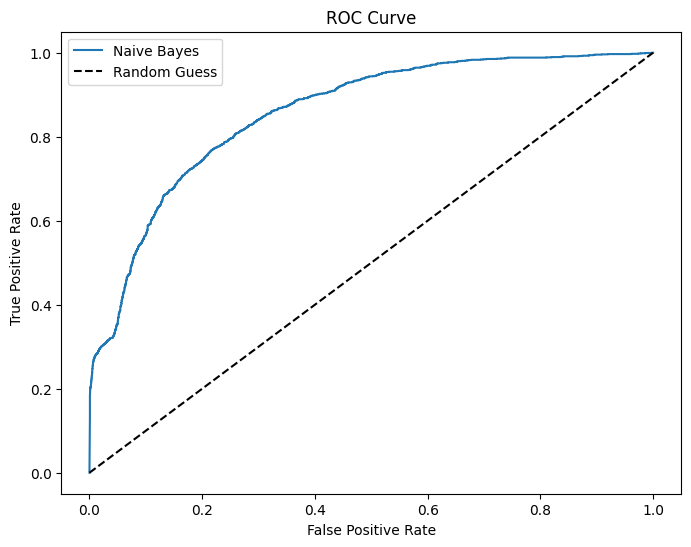

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')   
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('roc_curve.png')
plt.legend()
